$\newcommand{\mr}[1]{\mathrm{#1}}$ 
$\newcommand{\bmr}[1]{\mathit{\mathbf{#1}}}$ 
$\newcommand{\tr}{^\mathrm{T}}$
$\newcommand{\lbr}{\left\lbrace}$
$\newcommand{\rbr}{\right\rbrace}$
$\newcommand{\dd}{\mathrm{d}}$
$\newcommand{\jj}{\mathrm{j}}$

## <center> Pomoćne funkcije
Interaktivni grafici koriste Python modul mpld3, koji se može instalirati komandom
    
    
    conda install mpld3
    
Primeri rade i ukoliko modul mpld3 nije instaliran, ali grafici neće biti interaktivni.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
try:
    import mpld3
    mpld3.enable_notebook()
    print("Modul mpld3 je instaliran.")
except:
    print("Modul mpld3 nije instaliran.")
    
def plotSpectrum(x, xlabel = "", ylabel="", title="", show=True):
    n = len(x)
    plt.plot(np.fft.fftshift(np.fft.fftfreq(n)),np.fft.fftshift(abs(np.fft.fft(x))));
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()
    
def stemSpectrum(x, xlabel = "", ylabel="", title="", show=True):
    n = len(x)
    F = np.fft.fftshift(np.fft.fftfreq(n))
    X = np.fft.fftshift(abs(np.fft.fft(x)))
    plt.stem(F, X)#, use_line_collection=True);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()

def plotSignal(x, xlabel = "", ylabel="", title="", show=True):
    plt.plot(x);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()

def stemSignal(x, xlabel = "", ylabel="", title="", show=True):
    plt.stem(x)# ,use_line_collection=True);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()
    

Modul mpld3 nije instaliran.


# <center> Generisanje test signala
    
Test signal željenog oblika spektra je koristan za demonstraciju efekata primene algoritama za obradu signala.
Diskretni spektar od $N$ tačaka koji se u opsegu digitalnih učestanosti $F=(F_\mr{start},F_\mr{end})$ linearno menja od amplitude $(A_\mr{start},A_\mr{end})$ se može konstruisati kao:


$$
i_\mr{start} = \mr{round}(N \cdot F_\mr{start})
$$
$$
i_\mr{end} = \mr{round}(N \cdot F_\mr{end})
$$
$$
X(n) = 
\begin{cases}
0 &, n>i_\mr{end} \vee n<i_\mr{start} \\
A_\mr{start} - \dfrac{n-i_\mathrm{start}}{i_\mr{end}-i_\mr{start}} (A_\mr{start}-A_\mr{end}) &, inače
\end{cases}
$$


Spektar $X(n)$ nije konjugovano-kompleksno simetričan, pošto su sadrži komponente samo na pozitivnim učestanostima.
Usled toga je signal u vremenskom domenu $x(n)$ analitički
$$
x(n) = x_\mr{r}(n) + \jj \mathcal{H}\left\lbrace x_\mr{r}(n) \right\rbrace(n)
$$
gde je $\mathcal{H}\left\lbrace x_\mr{r}(n) \right\rbrace(n)$ Hilbertova transformacije signala $x_\mr{r}(n)$.

Odbirci u vremenskom domenu se dobijaju inverznom diskretnom Furijeovom transformacijom konstruisanog spektra $X(n)$:
$$
x(n) = IDFT(X)(n)
$$

In [2]:
import numpy as np
def genTestSpectrum(n, freq, amp, randPhase=False):
    # Generate test spectrum
    # Arguments:
    #    n    - number of samples
    #    freq - tuple of digital frequencies (startFreq, endFreq) in range (0, 0.5)
    #    amp  - tuple of amplitudes (ampStart, ampEnd)
    #    randPhase - if True, assign random phase to each sample
    x = np.zeros(n, dtype='complex128')
    freqStart, freqEnd = freq
    ampStart, ampEnd = amp
    indStart = round(n*freqStart)
    indEnd = round(n*freqEnd)
    x[indStart:indEnd] = ampStart - np.linspace(0, 1, num=indEnd-indStart) * (ampStart-ampEnd)
    if randPhase:
        x[indStart:indEnd] *= np.exp(1j*2*np.pi*np.random.rand(indEnd-indStart)) # randomize phase
    x[0] = 0 # suppress DC
    timeDomain = np.fft.ifft(x)
    return(timeDomain)

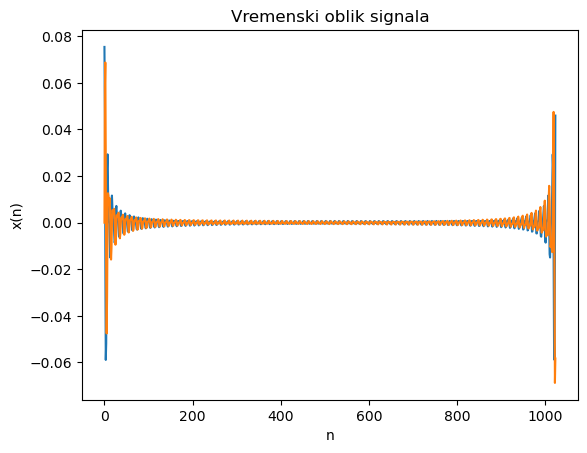

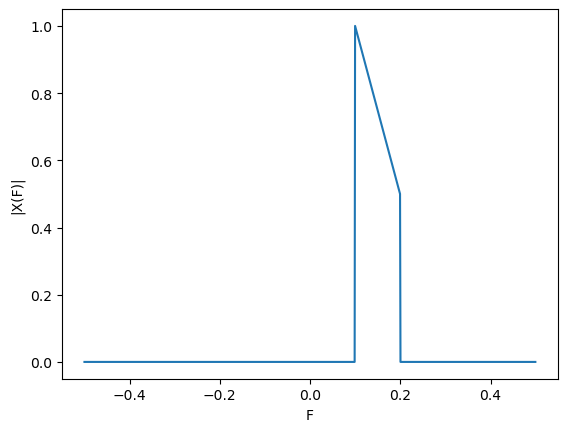

In [3]:
n = 1024
#x = 2*genTestSpectrum(n, [0.1, 0.2], [1,0.5]).real
x = genTestSpectrum(n, [0.1, 0.2], [1,0.5])
plt.title("Vremenski oblik signala")
plt.plot(x.real);
plt.plot(x.imag);
plt.xlabel('n'); plt.ylabel('x(n)');
plt.show();
plt.title("Spektar signala")
plotSpectrum(x, 'F', '|X(F)|')
plt.show()

# <center> Promena učestanosti odabiranja

# <center> Smanjivanje učestanosti odabiranja


In [4]:
def genSD(n, D, offset=0):
    # Generate sampling sequence s_D
    #    n - length of sequence
    #    D - sequence period
    #    offset - position of impulse
    sd = np.zeros(n);
    sd[offset%D::D] = 1.0
    return(sd)

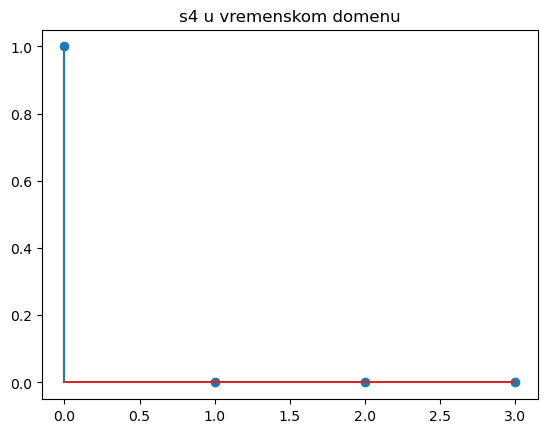

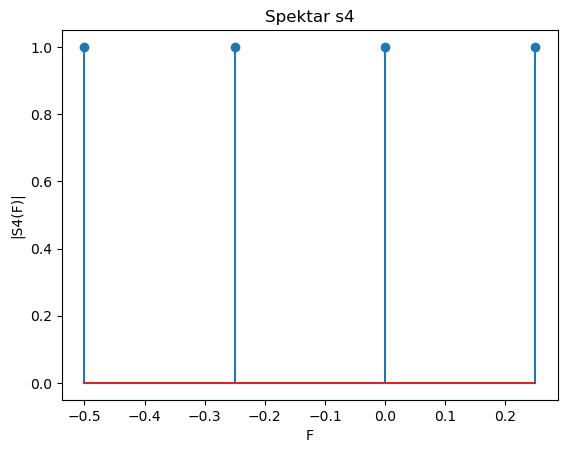

In [5]:
s4 = genSD(4,4,0)
stemSignal(s4, title="s4 u vremenskom domenu")
plt.show()
stemSpectrum(s4, 'F', '|S4(F)|', "Spektar s4")


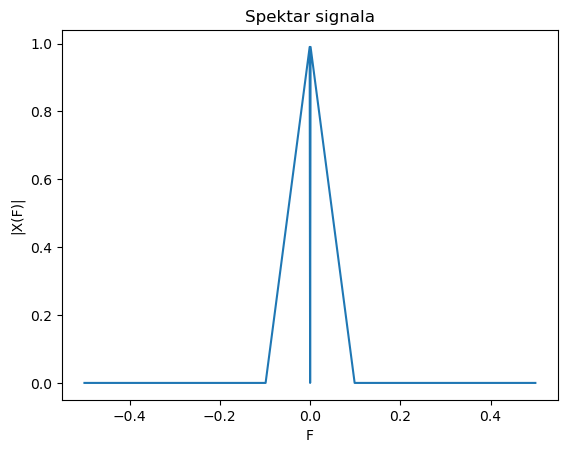

In [6]:
n = 1024
x = 2 * genTestSpectrum(n, [0.0, 0.1], [1,0]).real
plotSpectrum(x,'F','|X(F)|', 'Spektar signala')

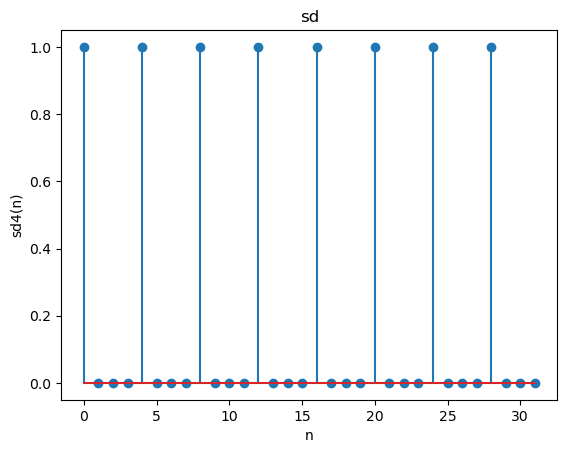

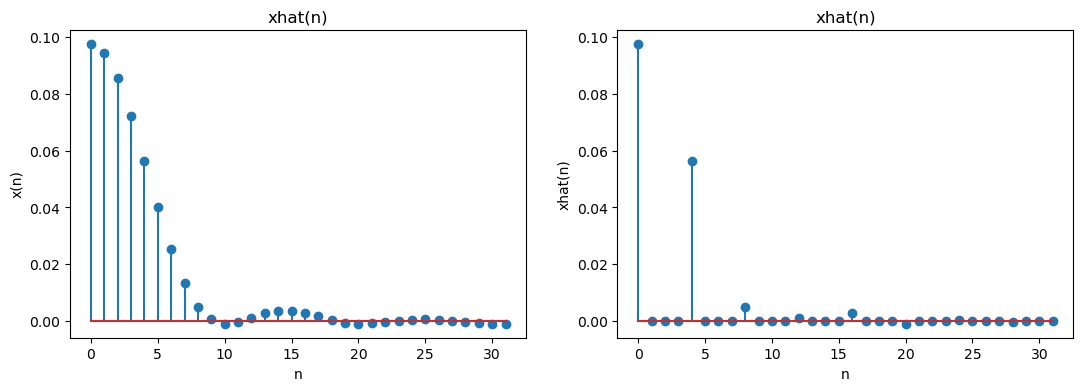

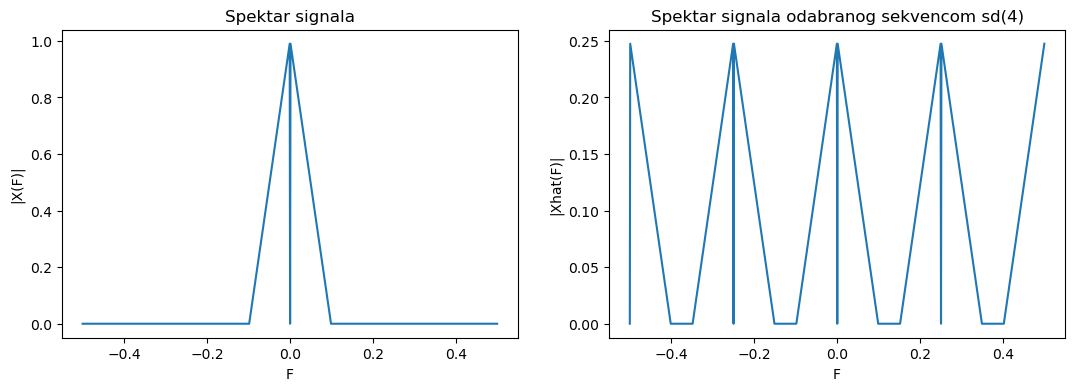

In [7]:
D = 4
sd = genSD(n, D, 0)
xhat = x * sd
stemSignal(sd[0:32], 'n', 'sd4(n)', 'sd');
figH = 4
plt.subplots(2,2,figsize=(2*1.618*figH,figH))
plt.subplot(1,2,1)
stemSignal(x[0:32], 'n', 'x(n)', 'xhat(n)',show=False)
plt.subplot(1,2,2)
stemSignal(xhat[0:32], 'n', 'xhat(n)', 'xhat(n)')
plt.subplots(2,2,figsize=(2*1.618*figH,figH))
plt.subplot(1,2,1)
plotSpectrum(x, 'F', '|X(F)|', 'Spektar signala', show=False)
plt.subplot(1,2,2)
plotSpectrum(xhat, 'F', '|Xhat(F)|', 'Spektar signala odabranog sekvencom sd(4)')


# <center> Kompresor

In [8]:
def compressor(x, D):
    # Downsample the signal by factor D
    #   x - input signal
    #   D - downsampling factor
    return x[0::D]

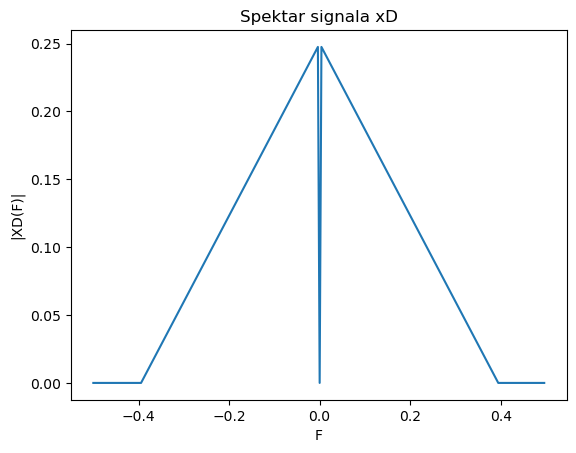

In [9]:
D = 4
xD = compressor(xhat, D)
plotSpectrum(xD, 'F', '|XD(F)|', "Spektar signala xD");

# <center> Parcijalne sekvence


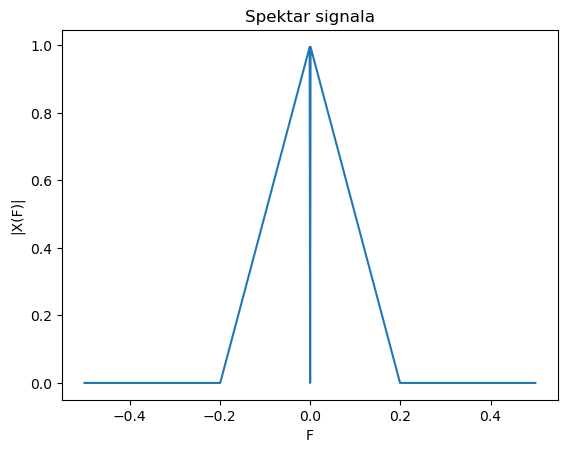

In [10]:
n = 1024
x = 2 * genTestSpectrum(n, [0.0, 0.2], [1,0]).real
plotSpectrum(x,'F','|X(F)|', 'Spektar signala')

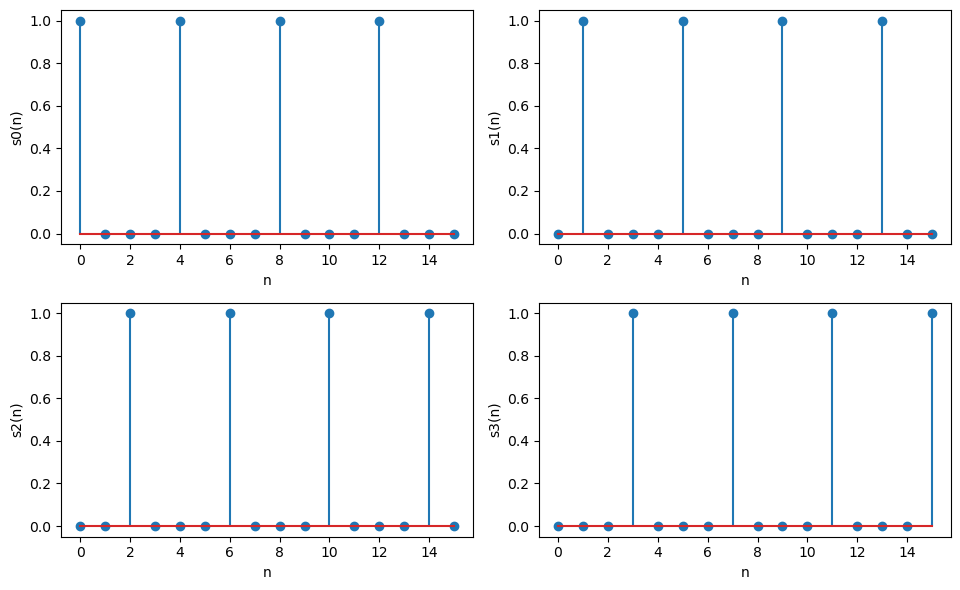

In [11]:
s0 = genSD(n, 4, 0)
s1 = genSD(n, 4, 1)
s2 = genSD(n, 4, 2)
s3 = genSD(n, 4, 3)
figH = 6
plt.subplots(2,2,figsize=(1.618*figH,figH))
plt.subplot(2,2,1)
stemSignal(s0[0:16],'n','s0(n)',show=False)
plt.subplot(2,2,2)
stemSignal(s1[0:16],'n','s1(n)',show=False)
plt.subplot(2,2,3)
stemSignal(s2[0:16],'n','s2(n)',show=False)
plt.subplot(2,2,4)
stemSignal(s3[0:16],'n','s3(n)',show=False)
plt.tight_layout()
plt.show()

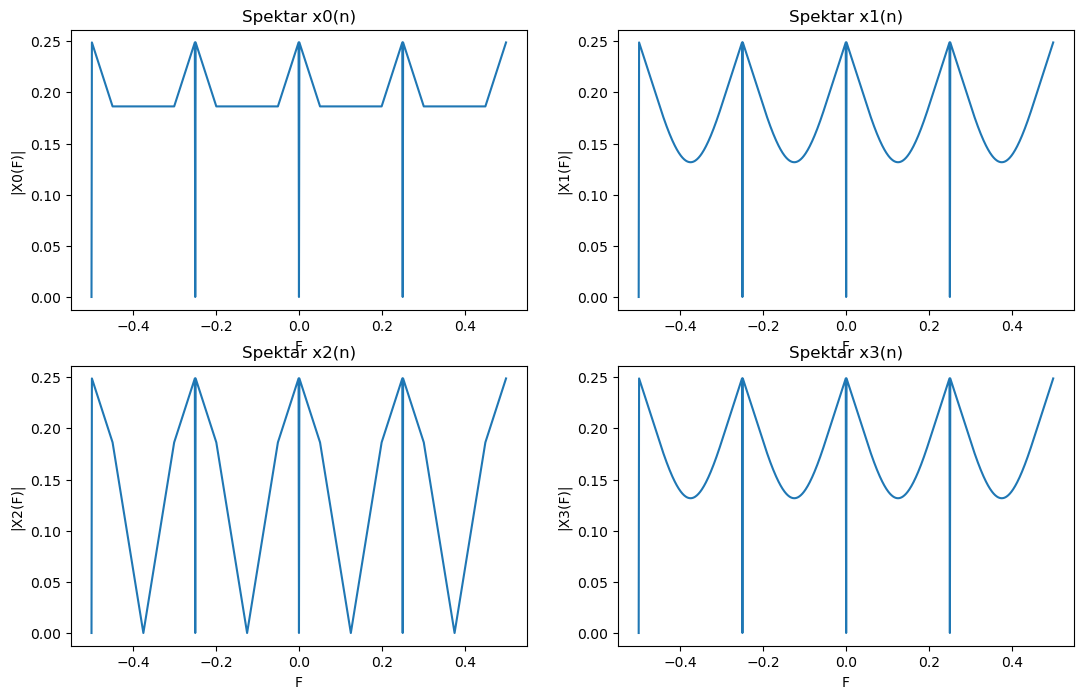

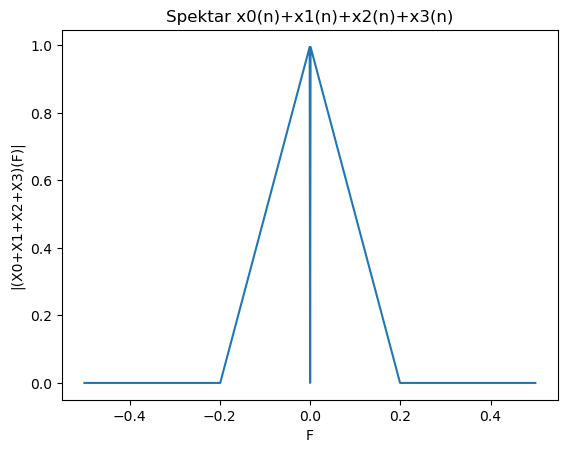

In [12]:
x0 = x * s0
x1 = x * s1
x2 = x * s2
x3 = x * s3
figH = 8
plt.subplots(2,2,figsize=(1.618*figH,figH))
plt.subplot(2,2,1)
plotSpectrum(x0, 'F', '|X0(F)|', 'Spektar x0(n)',show=False)
plt.subplot(2,2,2)
plotSpectrum(x1, 'F', '|X1(F)|', 'Spektar x1(n)',show=False)
plt.subplot(2,2,3)
plotSpectrum(x2, 'F', '|X2(F)|', 'Spektar x2(n)',show=False)
plt.subplot(2,2,4)
plotSpectrum(x3, 'F', '|X3(F)|', 'Spektar x3(n)',show=False)
plt.show()
plotSpectrum(x0+x1+x2+x3,'F', '|(X0+X1+X2+X3)(F)|', 'Spektar x0(n)+x1(n)+x2(n)+x3(n)')

# <center> Povećavanje učestanosti odabiranja


# <center> Ekspander


In [13]:
def expander(x, I):
    # Upsample the signal by factor D
    #   x - input signal
    #   I - upsampling factor
    nx = len(x)
    xI = np.zeros(nx*I)
    xI[::I] = x
    return xI    

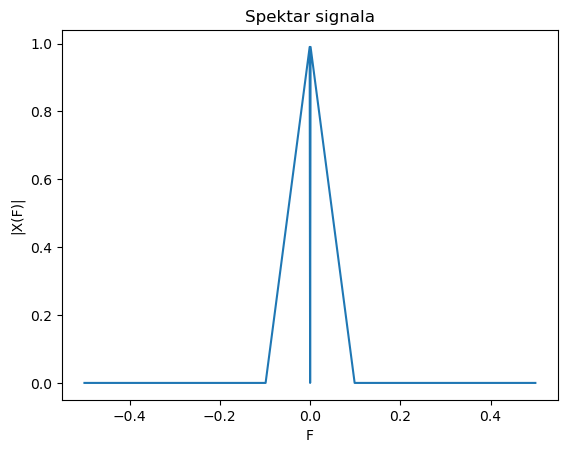

In [14]:
n = 1024
x = 2 * genTestSpectrum(n, [0.0, 0.1], [1,0]).real
plotSpectrum(x,'F','|X(F)|', 'Spektar signala')

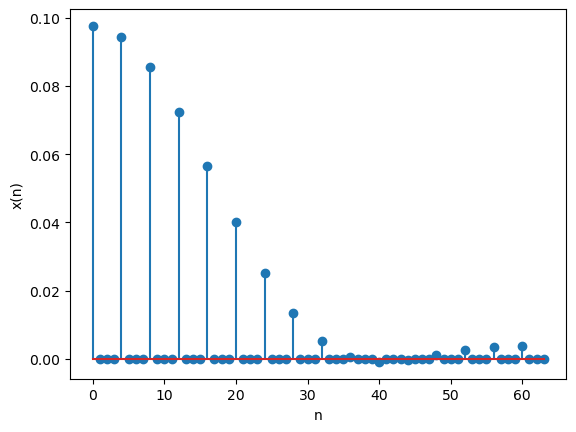

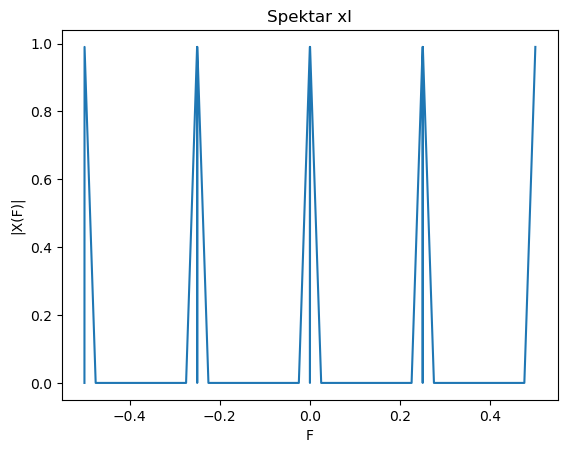

In [15]:
I = 4
xI = expander(x, I)
stemSignal(xI[0:64], 'n', 'x(n)' );
plt.show();
plotSpectrum(xI, 'F', '|X(F)|', 'Spektar xI')